Ridge regression: example with polynomial features

In [35]:
using Plots
using Random
using LinearAlgebra
using Statistics

Generate some simple baseline data (linear univariate function + noise)

In [36]:
n = 25 # number of data samples
u = range(0, stop=1, length=n) # input data
y = 1 .+ 2*u + 0.1*randn(n); # Ground truth outpt data


Perform an OLS fitting for polynomials of different order and visualize the results

In [37]:
scatter(u, y, label="data", legend=:bottomright, 
        background_color="#000000") # Plot ground truth data
for i in [2 5 10 11] # considered polynomial orders for input features
    Z = hcat([u.^j for j in 0:i]...) # Generate polynomial regression features    
    w = inv(Z'*Z)*Z'*y # Perform OLS regression
    plot!(u, Z*w, label="order $i", background_color="#000000")
end

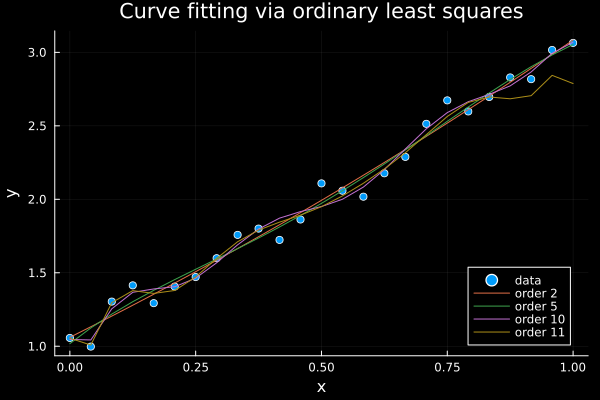

In [38]:
# show prevoius plot output
plot!(legend=:bottomright, xlabel="x", ylabel="y", 
        title="Curve fitting via ordinary least squares",
        background_color="#000000")

Perform the same curve fitting for ridge regression and visualize the results

In [43]:
scatter(u, y, label="data", legend=:bottomright,
        background_color="#000000") # Plot ground truth data
for i in [2 5 10 11]
    Z = hcat([u.^j for j in 0:i]...) # Generate polynomial regression features
    Z_mean = mean(Z, dims=1) # Calculate mean of inputs features per column
    Z_std = std(Z, dims=1) # Calculate standard deviation of input features per column
    Z_std[Z_std .== 0] .= 1 # Replace zero standard deviation with 1 to avoid division by zero
    Z = (Z .- Z_mean)./Z_std # Normalize input features
    y_mean = mean(y) # Calculate mean of output data
    y_std = std(y) # Calculate standard deviation of output data
    w = inv(Z'*Z + 1*I)*(Z'*(y.-y_mean)./y_std) # Perform ridge regression
    plot!(u, (Z*w).*y_std.+y_mean, label="order $i",
            background_color="#000000") # Plot ridge regression output (and denormalize prediction)
end


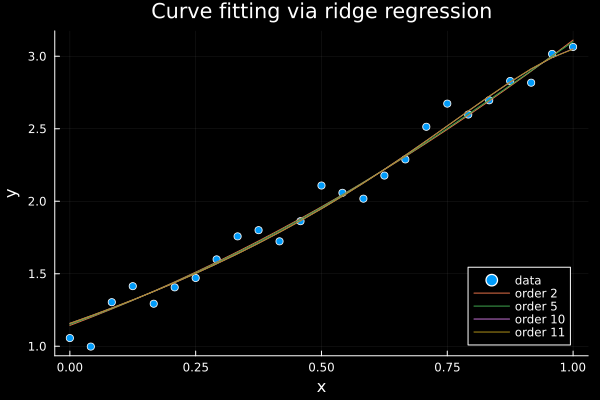

In [44]:
# show previous plot output
plot!(legend=:bottomright, xlabel="x", ylabel="y", title="Curve fitting via ridge regression",
        background_color="#000000")